In [1]:
import os

In [2]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
import numpy as np

In [4]:
import tensorflow as tf

In [5]:
import tensorflow.keras.layers  as KL

In [6]:
import tensorflow.keras.models  as KM

# Dataset Download

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

# Model with Adam loss function

In [9]:
inputs = KL.Input(shape=(28, 28, 1))
c = KL.Conv2D(32, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = KL.Flatten()(c)
outputs = KL.Dense(10, activation=tf.nn.softmax)(f)

In [19]:
model = KM.Model(inputs, outputs)
model.summary()
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0   

In [20]:
history = model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0329 - accuracy: 0.9889
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0340 - accuracy: 0.9891
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0314 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0327 - accuracy: 0.9898
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0181 - accuracy: 0.9936
Test Loss: 0.018103433772921562 - Test Acc: 0.9936000108718872


In [21]:
import matplotlib.pyplot as plt

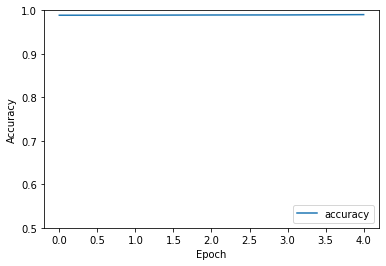

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')